In [4]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 112 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638465 sha256=c0eb3d801caab9f2c7efbf7a6a1f4ebf74f3665550c14d44c9bd598867574981
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [5]:
import pandas as pd
from fbprophet import Prophet

In [6]:
path = 'https://raw.githubusercontent.com/nicknochnack/TimeSeriesForecastingProphet/main/dataset.csv'

df = pd.read_csv(path, header=0)

In [7]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [12]:
print(df['Product'].unique())
print(df['Store'].unique())
#there is no unique product or store

[2667437]
['QLD_CW_ST0203']


In [13]:
#transform the dtypes to ds & y
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [14]:
df = df.loc[(df['Product']==2667437) & (df['Store']=='QLD_CW_ST0203')]
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [15]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [16]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

In [17]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3040.168654,801.092785,3921.715181,3040.168654,3040.168654,-646.907682,-646.907682,-646.907682,462.591916,...,16.646724,16.646724,16.646724,-1126.146323,-1126.146323,-1126.146323,0.0,0.0,0.0,2393.260972
1,2018-01-02,3040.968888,955.001052,3918.436436,3040.968888,3040.968888,-656.878775,-656.878775,-656.878775,462.591916,...,-11.260909,-11.260909,-11.260909,-1108.209782,-1108.209782,-1108.209782,0.0,0.0,0.0,2384.090113
2,2018-01-03,3041.769121,966.959740,3917.968724,3041.769121,3041.769121,-630.891873,-630.891873,-630.891873,462.591916,...,-4.393592,-4.393592,-4.393592,-1089.090198,-1089.090198,-1089.090198,0.0,0.0,0.0,2410.877248
3,2018-01-04,3042.569354,857.771845,4015.050301,3042.569354,3042.569354,-583.805741,-583.805741,-583.805741,462.591916,...,22.468361,22.468361,22.468361,-1068.866019,-1068.866019,-1068.866019,0.0,0.0,0.0,2458.763613
4,2018-01-05,3043.369588,803.680808,3931.658055,3043.369588,3043.369588,-619.671450,-619.671450,-619.671450,462.591916,...,-34.595035,-34.595035,-34.595035,-1047.668332,-1047.668332,-1047.668332,0.0,0.0,0.0,2423.698137


In [20]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,2393.260972,801.092785,3921.715181
1,2018-01-02,2384.090113,955.001052,3918.436436
2,2018-01-03,2410.877248,966.959740,3917.968724
3,2018-01-04,2458.763613,857.771845,4015.050301
4,2018-01-05,2423.698137,803.680808,3931.658055
...,...,...,...,...
1175,2021-03-22,3722.470077,2254.126473,5328.106316
1176,2021-03-23,3706.077255,2072.271223,5243.501570
1177,2021-03-24,3721.679958,2078.189598,5357.970385
1178,2021-03-25,3753.914404,2114.644566,5371.270854


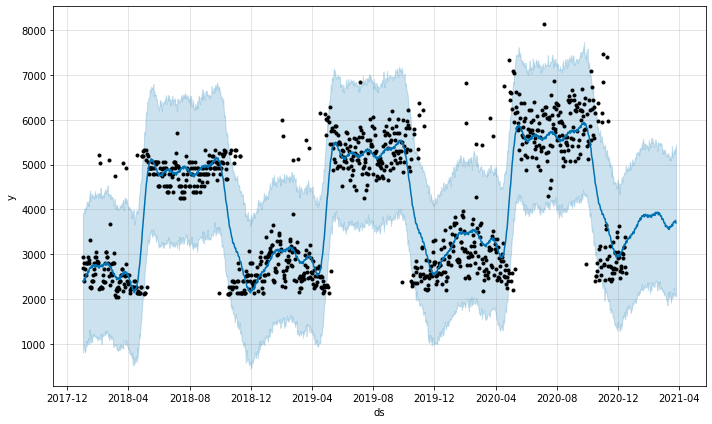

In [18]:
plot1 = m.plot(forecast)

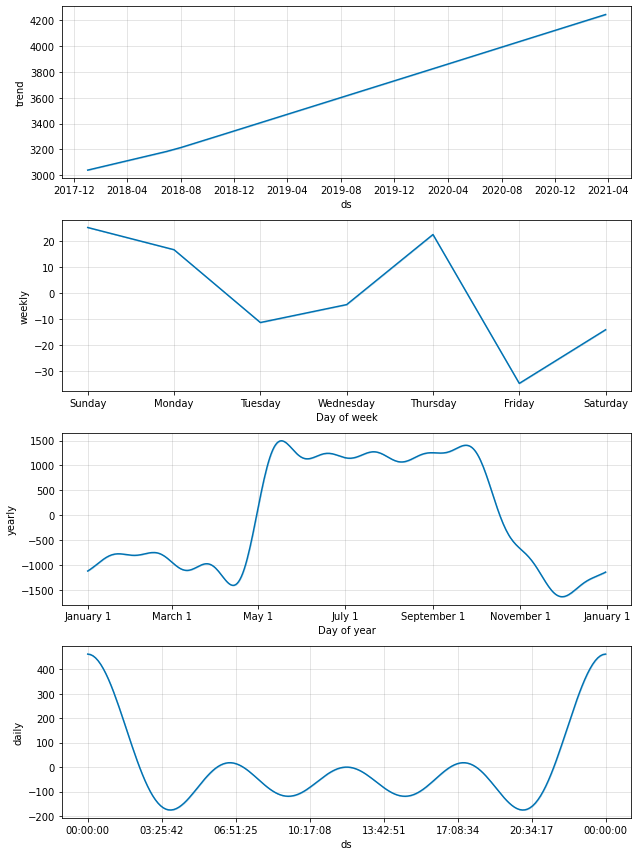

In [19]:
plt2 = m.plot_components(forecast)